In [41]:
import numpy as np
import pandas as pd

#For data viz
import seaborn as sns
import matplotlib.pyplot as plt

#For creating LSTM model
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.layers import LSTM

#import tensorflow as tf

In [40]:
df=pd.read_csv(r'C:\Tesla.csv - Tesla.csv.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [21]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [24]:
df1=df.reset_index()['Close']
df.Date=pd.to_datetime(df.Date)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 92.7 KB


In [26]:
df1=df.reset_index()['Close']

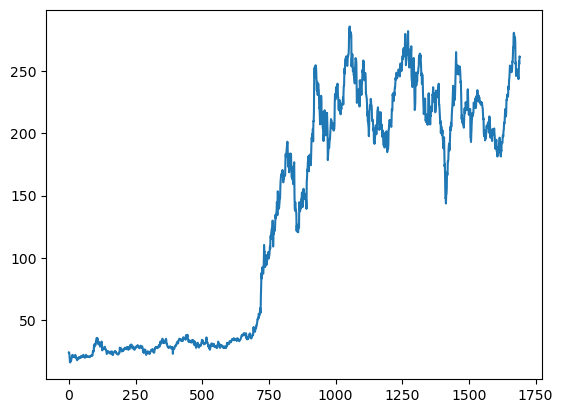

In [27]:
plt.plot(df1)

In [28]:
from statsmodels.tsa.stattools import adfuller

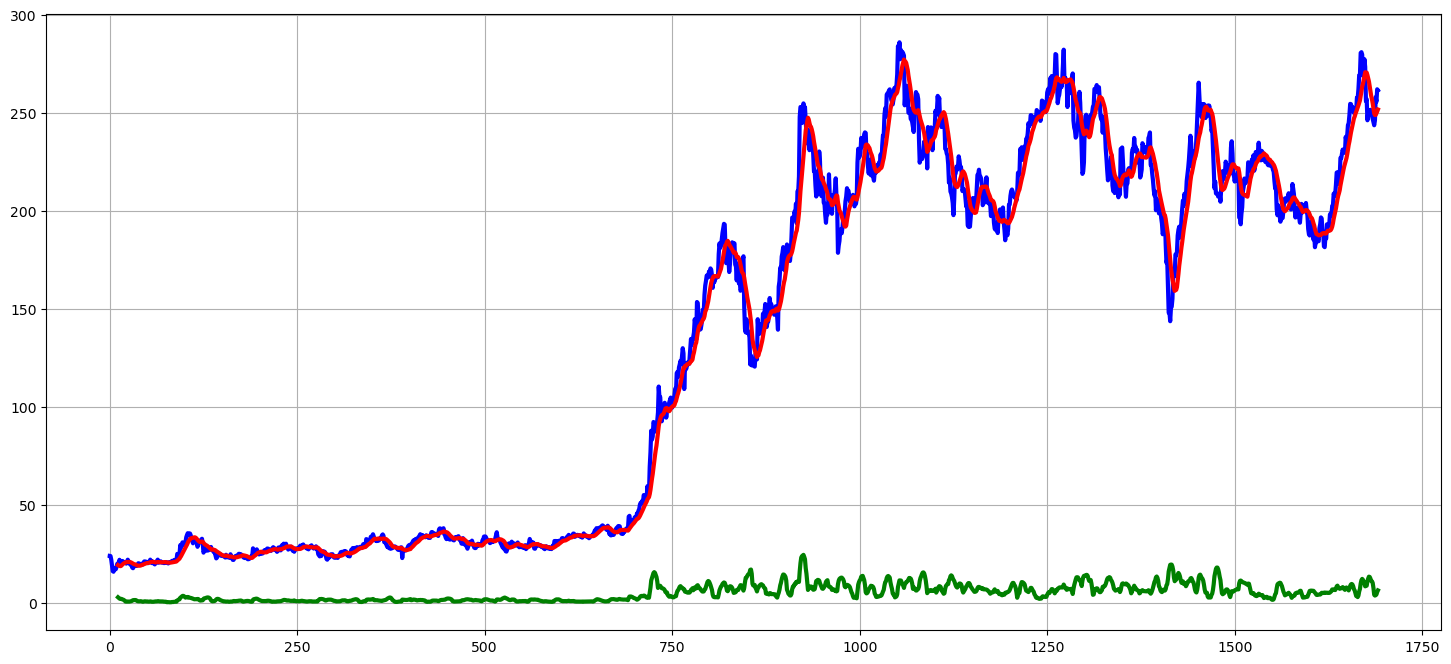

Test Statistics             -0.813733
p-value                      0.815055
No of lags                   0.000000
No of observation used    1691.000000
critical value (1%)         -3.434223
critical value (5%)         -2.863251
critical value (10%)        -2.567681
dtype: float64


In [29]:
def test_stationary(timeseries):
    rolemean=timeseries.rolling(12).mean()
    rolestd=timeseries.rolling(12).std()
    plt.figure(figsize=(18,8))
    plt.grid('both')
    plt.plot(timeseries,color='blue',label='Orginal',linewidth=3)
    plt.plot(rolemean,color='red',label='Rolling Mean',linewidth=3)
    plt.plot(rolestd,color='green',label='Rolling Std',linewidth=3)
    plt.show()
    adft=adfuller(timeseries,autolag='AIC')
    output=pd.Series(adft[0:4],index=['Test Statistics','p-value','No of lags','No of observation used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key]=values
    print(output)    
test_stationary(df1) 

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))#Since it contains the single feature,reshape it to have a 2 dim
df1

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))#Since it contains the single feature,reshape it to have a 2 dim
df1

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

In [32]:
df1.ndim

2

In [33]:
df1.shape

(1692, 1)

In [34]:
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size],df[training_size:len(df)]

In [35]:
train_data=df[0:training_size]

In [36]:
train_data

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1179,2015-03-06,199.210007,200.750000,192.149994,193.880005,6712400,193.880005
1180,2015-03-09,194.389999,194.490005,188.250000,190.880005,6736700,190.880005
1181,2015-03-10,188.460007,193.500000,187.600006,190.320007,5579700,190.320007
1182,2015-03-11,191.149994,196.179993,191.009995,193.740005,4974900,193.740005


In [37]:
training_size,test_size

(1184, 508)